In [64]:
# import elevation
# import os
# import regionmask
import geopandas as gpd
import rasterio
import rioxarray

import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# Data preparation

In [5]:
ds = xr.open_dataset('./UA_SWE/4km_SWE_Depth_WY1982_v01.nc')

In [6]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:   (lat: 621, lon: 1405, time: 365, time_str_len: 11)
Coordinates:
  * lat       (lat) float32 2kB 24.08 24.12 24.17 24.21 ... 49.83 49.88 49.92
  * lon       (lon) float32 6kB -125.0 -125.0 -124.9 ... -66.58 -66.54 -66.5
  * time      (time) datetime64[ns] 3kB 1981-10-01 1981-10-02 ... 1982-09-30
Dimensions without coordinates: time_str_len
Data variables:
    crs       |S1 1B ...
    time_str  (time_str_len, time) |S1 4kB ...
    SWE       (time, lat, lon) float32 1GB ...
    DEPTH     (time, lat, lon) float32 1GB ...

In [7]:
ds.time

<xarray.DataArray 'time' (time: 365)> Size: 3kB
array(['1981-10-01T00:00:00.000000000', '1981-10-02T00:00:00.000000000',
       '1981-10-03T00:00:00.000000000', ..., '1982-09-28T00:00:00.000000000',
       '1982-09-29T00:00:00.000000000', '1982-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 1981-10-01 1981-10-02 ... 1982-09-30
Attributes:
    long_name:  time

In [8]:
ds.dims

FrozenMappingWarningOnValuesAccess({'lat': 621, 'lon': 1405, 'time': 365, 'time_str_len': 11})

In [9]:
path_ua = './UA_SWE/'
files_ua = path_ua + '4km_SWE_Depth*.nc'
ds_ua = xr.open_mfdataset(files_ua, engine="netcdf4")

In [10]:
ds_ua

<xarray.Dataset> Size: 107GB
Dimensions:   (time: 15340, time_str_len: 11, lat: 621, lon: 1405)
Coordinates:
  * lat       (lat) float32 2kB 24.08 24.12 24.17 24.21 ... 49.83 49.88 49.92
  * lon       (lon) float32 6kB -125.0 -125.0 -124.9 ... -66.58 -66.54 -66.5
  * time      (time) datetime64[ns] 123kB 1981-10-01 1981-10-02 ... 2023-09-30
Dimensions without coordinates: time_str_len
Data variables:
    crs       (time) |S1 15kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    time_str  (time_str_len, time) |S1 169kB dask.array<chunksize=(11, 365), meta=np.ndarray>
    SWE       (time, lat, lon) float32 54GB dask.array<chunksize=(61, 104, 235), meta=np.ndarray>
    DEPTH     (time, lat, lon) float32 54GB dask.array<chunksize=(61, 104, 235), meta=np.ndarray>

In [11]:
skagit_boundary = gpd.read_file('SkagitBoundary.json')

In [12]:
skagit_boundary.explore()

In [45]:
# tuolumne_boundary = gpd.read_file("./Tuolumne Basin Boundary/tumlatlon.shp")
# tuolumne_boundary

,Id,geometry
0,0,"POLYGON Z ((-13312596.474 4605799.637 0, -1331..."


In [62]:
#tuolumne_boundary is in UTM coordinate system, we need to convert into lon/lat coordinate system first
tuolumne_boundary = gpd.read_file("./Tuolumne Basin Boundary/tumlatlon.shp")
tuolumne_boundary = tuolumne_boundary.to_crs("EPSG:4326")

In [63]:
tuolumne_boundary

,Id,geometry
0,0,"POLYGON Z ((-119.58909 38.18646 0, -119.589 38..."


In [50]:
tuolumne_boundary.explore()

# Explore on ua data

In [54]:
skagit_boundary

,OBJECTID,AREA,PERIMETER,SKAGIT_,SKAGIT_ID,GRID_CODE,Shape_Leng,Shape_Area,geometry
0,1,8.060220e+09,948300.0,2,1,1,948300.0,8.060220e+09,"POLYGON ((-120.81726 49.26101, -120.8152 49.26..."


In [55]:
tuolumne_boundary

,Id,geometry
0,0,"POLYGON Z ((-119.58909 38.18646 0, -119.589 38..."


In [17]:
ds_ua.SWE.dims

('time', 'lat', 'lon')

In [18]:
ds_ua.SWE

<xarray.DataArray 'SWE' (time: 15340, lat: 621, lon: 1405)> Size: 54GB
dask.array<concatenate, shape=(15340, 621, 1405), dtype=float32, chunksize=(92, 104, 235), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 2kB 24.08 24.12 24.17 24.21 ... 49.83 49.88 49.92
  * lon      (lon) float32 6kB -125.0 -125.0 -124.9 ... -66.58 -66.54 -66.5
  * time     (time) datetime64[ns] 123kB 1981-10-01 1981-10-02 ... 2023-09-30
Attributes:
    long_name:     Snow Water Equivalent
    grid_mapping:  crs
    units:         millimeters h20

In [19]:
one_day = ds_ua.SWE.sel(time='1985/01/29', method='nearest')
one_day

<xarray.DataArray 'SWE' (lat: 621, lon: 1405)> Size: 3MB
dask.array<getitem, shape=(621, 1405), dtype=float32, chunksize=(104, 235), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 2kB 24.08 24.12 24.17 24.21 ... 49.83 49.88 49.92
  * lon      (lon) float32 6kB -125.0 -125.0 -124.9 ... -66.58 -66.54 -66.5
    time     datetime64[ns] 8B 1985-01-29
Attributes:
    long_name:     Snow Water Equivalent
    grid_mapping:  crs
    units:         millimeters h20

In [20]:
poly = skagit_boundary.geometry.to_list()
one_day = one_day.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
one_day.rio.write_crs("epsg:4326", inplace=True)
one_day_clipped = one_day.rio.clip(poly, crs="epsg:4326")

In [21]:
one_day_clipped

<xarray.DataArray 'SWE' (lat: 33, lon: 39)> Size: 5kB
dask.array<getitem, shape=(33, 39), dtype=float32, chunksize=(33, 39), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 132B 47.96 48.0 48.04 48.08 ... 49.21 49.25 49.29
  * lon          (lon) float32 156B -122.3 -122.2 -122.2 ... -120.8 -120.7
    time         datetime64[ns] 8B 1985-01-29
    spatial_ref  int64 8B 0
    crs          int64 8B 0
Attributes:
    long_name:  Snow Water Equivalent
    units:      millimeters h20

# Clipping dataset on specific region

In [23]:
poly = skagit_boundary.geometry.to_list()
ua_skagit_clipped = ds_ua.SWE.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
ua_skagit_clipped = ua_skagit_clipped.rio.write_crs("epsg:4326", inplace=True)
ua_skagit_clipped = ua_skagit_clipped.rio.clip(poly, crs="epsg:4326")

In [24]:
ua_skagit_clipped

<xarray.DataArray 'SWE' (time: 15340, lat: 33, lon: 39)> Size: 79MB
dask.array<getitem, shape=(15340, 33, 39), dtype=float32, chunksize=(92, 33, 39), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 132B 47.96 48.0 48.04 48.08 ... 49.21 49.25 49.29
  * lon          (lon) float32 156B -122.3 -122.2 -122.2 ... -120.8 -120.7
  * time         (time) datetime64[ns] 123kB 1981-10-01 ... 2023-09-30
    spatial_ref  int64 8B 0
    crs          int64 8B 0
Attributes:
    long_name:  Snow Water Equivalent
    units:      millimeters h20

In [26]:
# Read the shapefile
shapefile = gpd.read_file("TuolumneBasin.json")
# Reproject to EPSG:4326 (Lat/Long)
shapefile = shapefile.to_crs("EPSG:4326")

In [27]:
shapefile

,Id,geometry
0,0,"POLYGON Z ((-2025671.07838 1936427.18817 0, -2..."


In [51]:
poly = tuolumne_boundary.geometry.to_list()
ua_tuolumne_clipped = ds_ua.SWE.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
ua_tuolumne_clipped = ua_tuolumne_clipped.rio.write_crs("epsg:4326", inplace=True)
ua_tuolumne_clipped = ua_tuolumne_clipped.rio.clip(poly, crs="epsg:4326")

In [52]:
ua_tuolumne_clipped

<xarray.DataArray 'SWE' (time: 15340, lat: 10, lon: 15)> Size: 9MB
dask.array<getitem, shape=(15340, 10, 15), dtype=float32, chunksize=(92, 10, 15), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 40B 37.79 37.83 37.88 37.92 ... 38.08 38.12 38.17
  * lon          (lon) float32 60B -119.8 -119.8 -119.7 ... -119.3 -119.2 -119.2
  * time         (time) datetime64[ns] 123kB 1981-10-01 ... 2023-09-30
    spatial_ref  int64 8B 0
    crs          int64 8B 0
Attributes:
    long_name:  Snow Water Equivalent
    units:      millimeters h20

# Plotting 

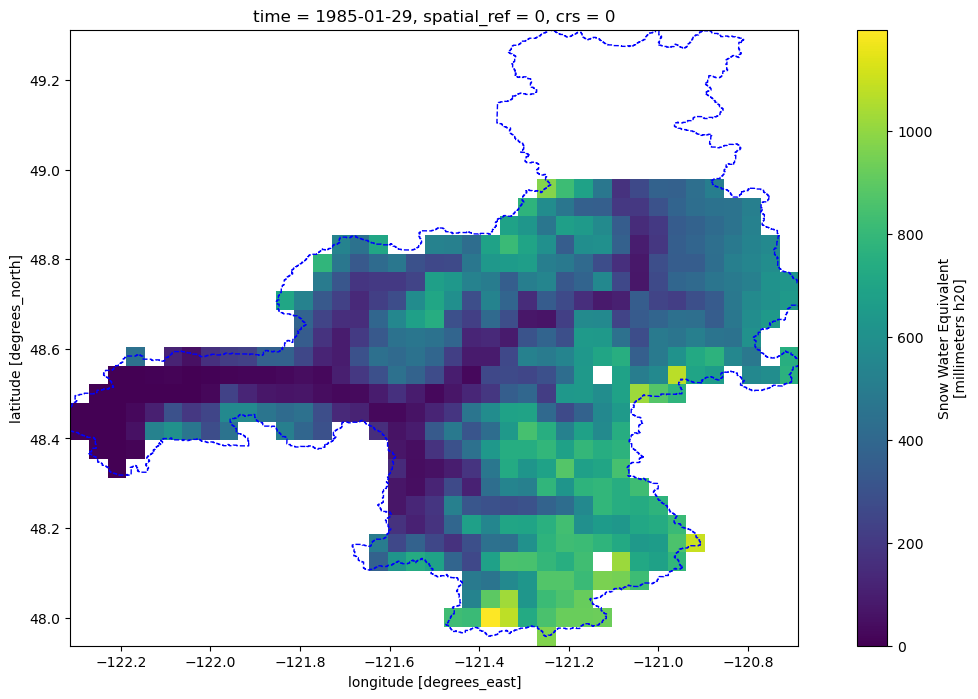

In [58]:
# Plot for skagit basin
fig, ax = plt.subplots(figsize=(15,8))

one_day = ua_skagit_clipped.sel(time='1985/01/29', method='nearest')
one_day.plot(ax=ax)

skagit_boundary.plot(ax=ax, edgecolor='blue', linestyle='--', facecolor='none');
ax.set_aspect(1)

In [44]:
ua_skagit_clipped_mean = ua_skagit_clipped.mean(dim= ('lat', 'lon'))

In [45]:
ua_skagit_clipped_mean

<xarray.DataArray 'SWE' (time: 15340)> Size: 61kB
dask.array<mean_agg-aggregate, shape=(15340,), dtype=float32, chunksize=(92,), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 123kB 1981-10-01 ... 2023-09-30
    spatial_ref  int64 8B 0
    crs          int64 8B 0

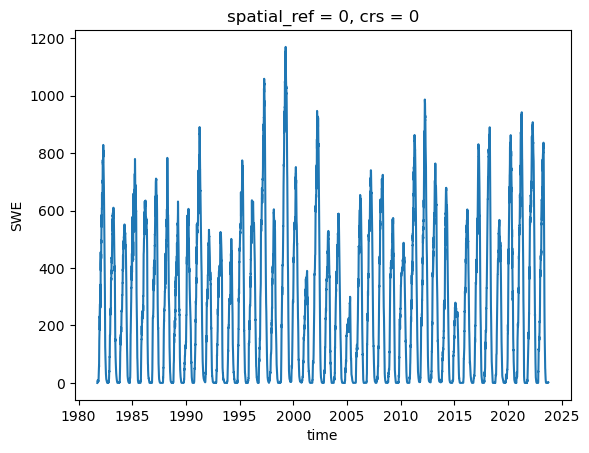

In [55]:
ua_skagit_clipped_mean.plot()

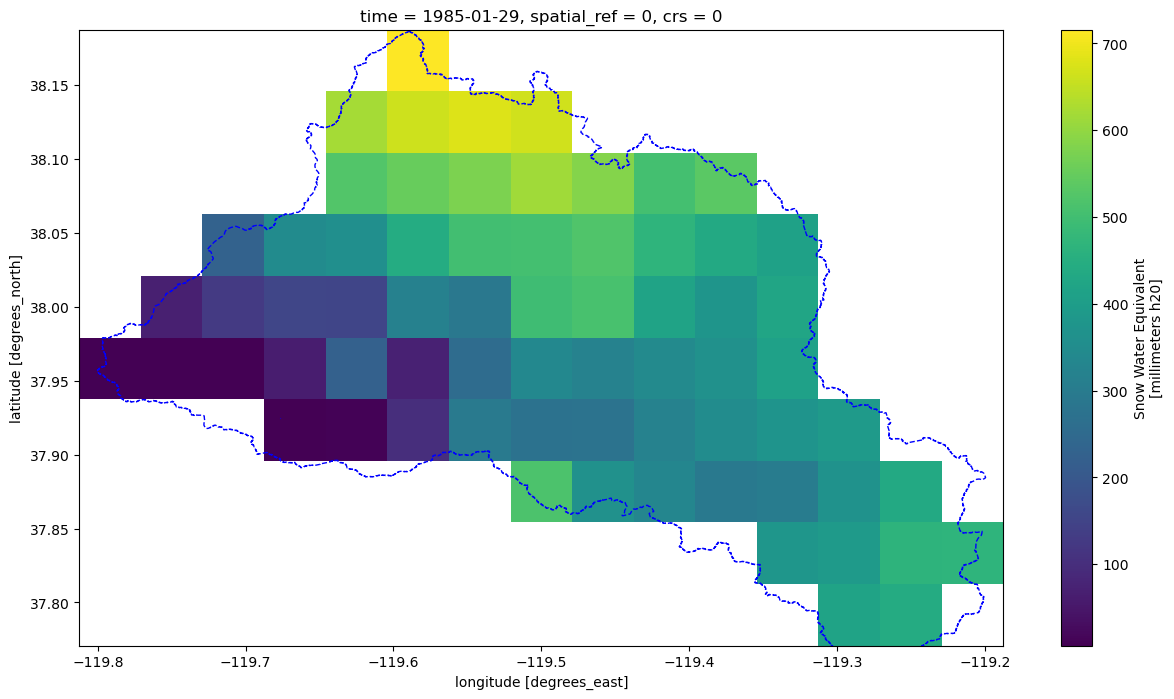

In [57]:
# Plot for Tuolumne basin
fig, ax = plt.subplots(figsize=(15,8))

one_day = ua_tuolumne_clipped.sel(time='1985/01/29', method='nearest')
one_day.plot(ax=ax)

tuolumne_boundary.plot(ax=ax, edgecolor='blue', linestyle='--', facecolor='none');
ax.set_aspect(1)

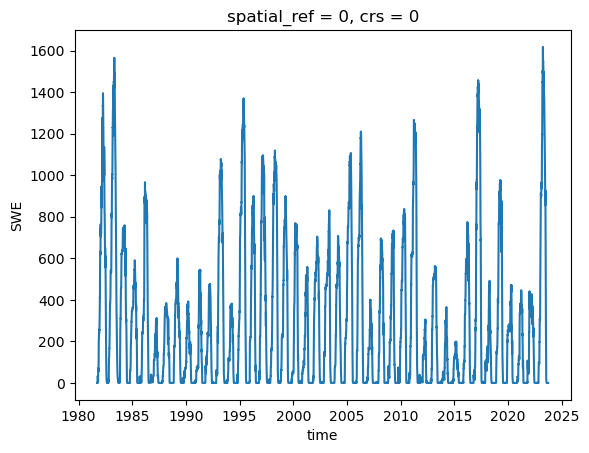

In [59]:
ua_tuolumne_clipped_mean = ua_tuolumne_clipped.mean(dim= ('lat', 'lon'))
ua_tuolumne_clipped_mean.plot()